In [1]:
# Dependencies
import pandas as pd
import csv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
#from datetime import datetime
import calendar #necessary to convert a timestamp into a date
#from datetime import datetime
import time
import seaborn as sns
from __future__ import division

In [2]:
%run '/Users/louis/Documents/DataScience/Reco/processing.py'

In [10]:
# define paths
path_movies = '/Users/louis/Documents/DataScience/Reco/Data/movies.csv'
path_ratings = '/Users/louis/Documents/DataScience/Reco/Data/ratings.csv'
path_users = '/Users/louis/Documents/DataScience/Reco/Data/users.csv'

# process movies
data_movies = process_movies(path_movies)
# process ratings
data_ratings = process_ratings(path_ratings)
# merge movies and rating
datam_ratings = data_ratings.merge(data_movies, left_on = 'movies_id', right_on = 'movies_id', how = 'left')
# process users info
data_users = process_users(path_users)

# Descriptive analysis - Movies

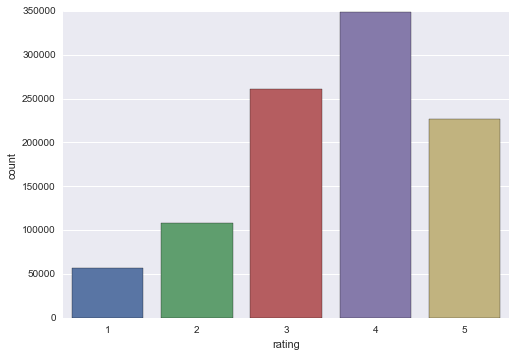

In [11]:
# frequence des ratings
pivot_rating = pd.pivot_table(datam_ratings, index = 'rating', values = 'user_id', aggfunc = 'count')
sns.countplot(data = datam_ratings, x = 'rating')

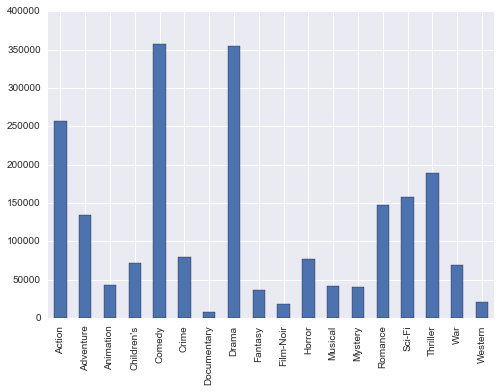

In [13]:
# number of ratings per category
pivot_cat = pd.pivot_table (datam_ratings, index = 'rating', aggfunc = 'sum')[categories].sum()
pivot_cat.plot(kind = 'bar')

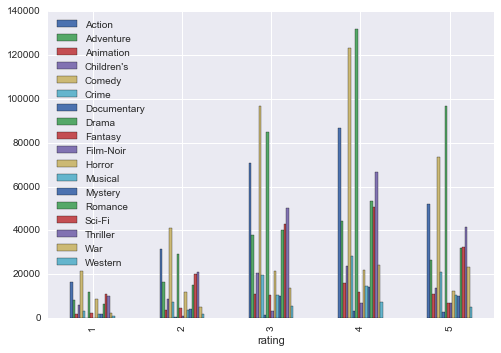

In [14]:
# ratings per category
pivot_cat = pd.pivot_table (datam_ratings, index = 'rating', aggfunc = 'sum')[categories]
pivot_cat.plot(kind="bar")

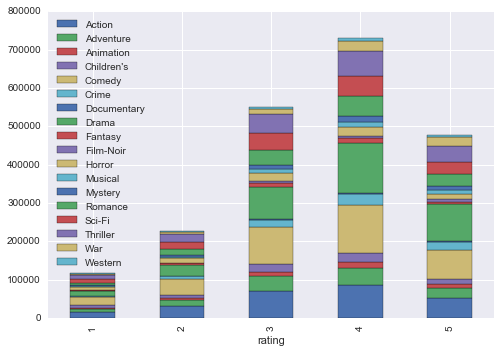

In [15]:
# ratings per category
pivot_ratings = pd.pivot_table(datam_ratings, index = 'rating',aggfunc ='sum')[categories]
pivot_ratings.head(4)
pivot_ratings.plot.bar(stacked = True)

In [16]:
pivot_metrics = pd.pivot_table(datam_ratings, index = 'movies_id', values = 'rating', aggfunc = [np.mean, np.min, np.max, np.median])
pivot_metrics.head()

,mean,amin,amax,median
movies_id,,,,
1,4.146846,1,5,4.0
2,3.201141,1,5,3.0
3,3.016736,1,5,3.0
4,2.729412,1,5,3.0
5,3.006757,1,5,3.0


In [18]:
df_ratings = datam_ratings[categories]
for label in categories:
    df_ratings[label] = df_ratings[label].mul(datam_ratings['rating'])


/Users/louis/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


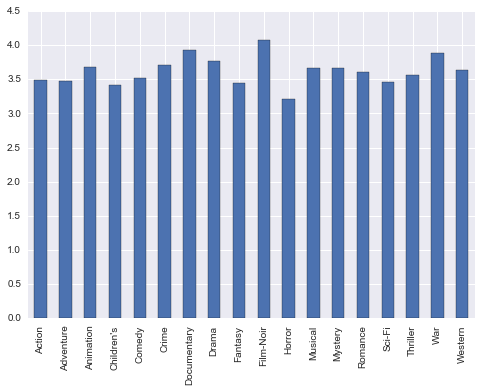

In [19]:
df_ratings = df_ratings.replace(0, np.NaN)
df_ratings.mean().plot.bar()

# Descriptive analysis - Users

In [21]:
data_users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,Under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455


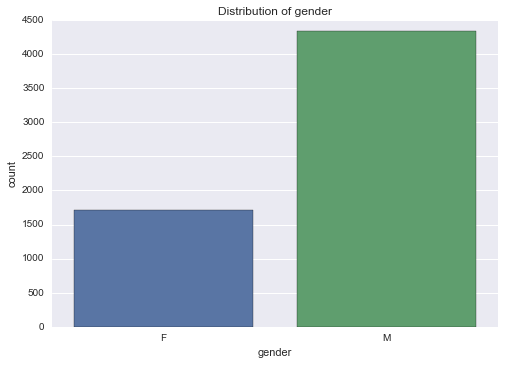

In [22]:
g = sns.countplot(data_users['gender'])
g.set_title('Distribution of gender')

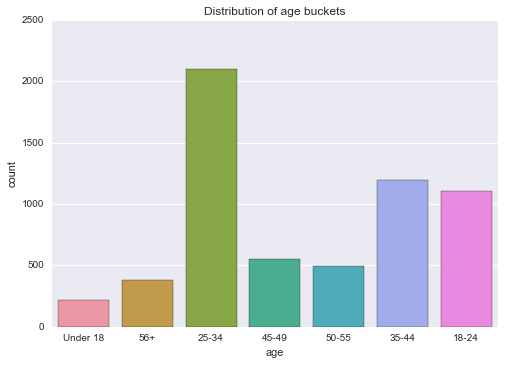

In [23]:
g = sns.countplot(data_users['age'])
g.set_title('Distribution of age buckets')

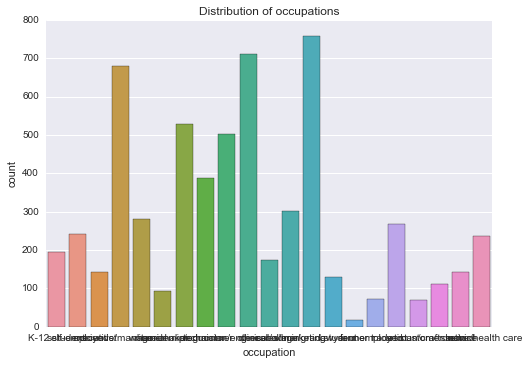

In [24]:
g = sns.countplot(data_users['occupation'])
g.set_title('Distribution of occupations')

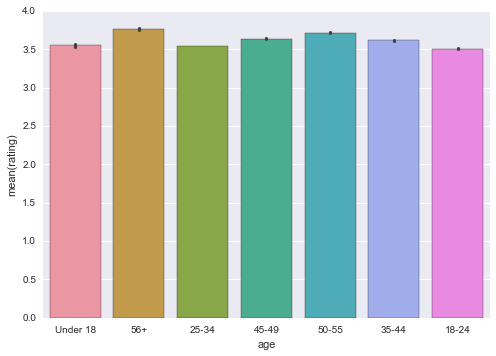

In [25]:
# average rating of each age bucket
rating_age = data_ratings.merge(data_users, left_on = 'user_id', right_on = 'user_id', how = 'left')
sns.barplot(rating_age['age'], rating_age["rating"])
#sns.barplot(x, y1, palette="BuGn_d", ax=ax1)

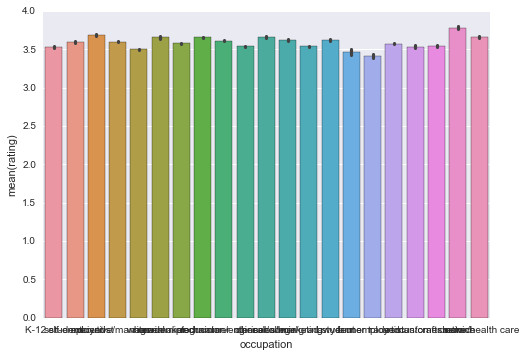

In [26]:
# average rating by occupation
sns.barplot(rating_age['occupation'], rating_age["rating"])

# Recommendation algorithm (only based on ratings)

In [ ]:
# Dependencies
import pandas as pd
import csv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
#from datetime import datetime
import calendar #necessary to convert a timestamp into a date
#from datetime import datetime
import time
import seaborn as sns
from __future__ import division
from math import sqrt
from decimal import *
# define precision of floats
getcontext().prec = 6

In [ ]:
# run processing script
%run '/Users/louis/Documents/DataScience/Reco/processing.py'
path_ratings = '/Users/louis/Documents/DataScience/Reco/Data/ratings.csv'
data_ratings = process_ratings(path_ratings)

In [ ]:
%run '/Users/louis/Documents/DataScience/Reco/reco_calc.py'

In [ ]:
user_id = 1
test_size = 40
number_of_users_predicted = 30
top_actual = 20
top_predicted = 100
#metrics = get_metrics(user_id, test_size, data_ratings, top_actual, top_predicted)
df_metrics = get_metrics_batch(test_size, number_of_users_predicted, data_ratings, top_actual, top_predicted)

In [ ]:
df_metrics.mean()

In [ ]:
a = 0
a += 1
a

In [ ]:
print a

# K-M on users

In [ ]:
# Note: KMeans can fall in local minima, hence should be run several times manually (not a parameter in sklearn)
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt 

In [ ]:
path_users = '/Users/louis/Documents/DataScience/Reco/Data/users.csv'
data_users = process_users(path_users)

In [ ]:
data_users.head()

In [ ]:
def process_data_users(data):
    # dummify
    columns_to_dummify = ['age', 'occupation']
    data_users = dummify(data, columns_to_dummify)
    # drop zip code
    del data_users['zip_code']
    # clean sex
    gender_hash = {'M': 0, 'F': 1}
    data_users['gender'] = data_users['gender'].map(gender_hash)
    return data_users

def dummify(df, column_names):
    dummies = pd.get_dummies(df, columns = column_names)
    return dummies

In [ ]:
# process data_users
data_users = process_data_users(data_users)

In [ ]:
# Instantiate the model
model = KMeans(n_clusters = 3)

In [ ]:
# center and normalize
data_users_norm = scale(data_users)

In [ ]:
model = model.fit(data_users_norm)

# Recommendation algorithm (incl users characteristics)

In [1]:
%run '/Users/louis/Documents/DataScience/Reco/processing.py'

In [2]:
path_users = '/Users/louis/Documents/DataScience/Reco/Data/users.csv'
data_users = process_users(path_users)
path_ratings = '/Users/louis/Documents/DataScience/Reco/Data/ratings.csv'
data_ratings = process_ratings(path_ratings)

In [3]:
%run '/Users/louis/Documents/DataScience/Reco/reco_calc.py'

In [ ]:
test_size = 10
number_of_users_predicted = 20
top_actual = 10
top_predicted = 50

weights = [0.1*i for i in range(0,10)]
for weight in weights:
    metrics = get_metrics_batch(test_size, number_of_users_predicted, data_ratings, top_actual, top_predicted, data_users, weight)  
    print 'Weight on ratings: %s' %weight + '/ ' + 'number_within: %s' %metrics.iloc[0,0] +  '/ ' + 'Mean error: %s' %metrics.iloc[0,1] 

